# Machine Learning Assignment 2

### Predicting Car MPG

Chezka Sino (9028-67538)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

### Loading the data

In [59]:
data = pd.read_csv("auto_mpg_data.csv")

Preview/print the top 10 rows of the data

In [60]:
data.head(10)

,model_name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1


### Creating the Features matrix

We drop the model name and mpg to create the matrix containing only the features

In [61]:
Features = data
Features = Features.drop(['model_name', 'mpg'], 1)
col_features = Features.columns
Features.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


### Creating the Labels vector

We create the vector containing only the labels which is mpg that we're trying to predict

In [62]:
Labels = data['mpg']
Labels.head(10)

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
6    14.0
7    14.0
8    14.0
9    15.0
Name: mpg, dtype: float64

### Plotting Features

These are scatterplots showing the relationship of mpg to each of the features in out data

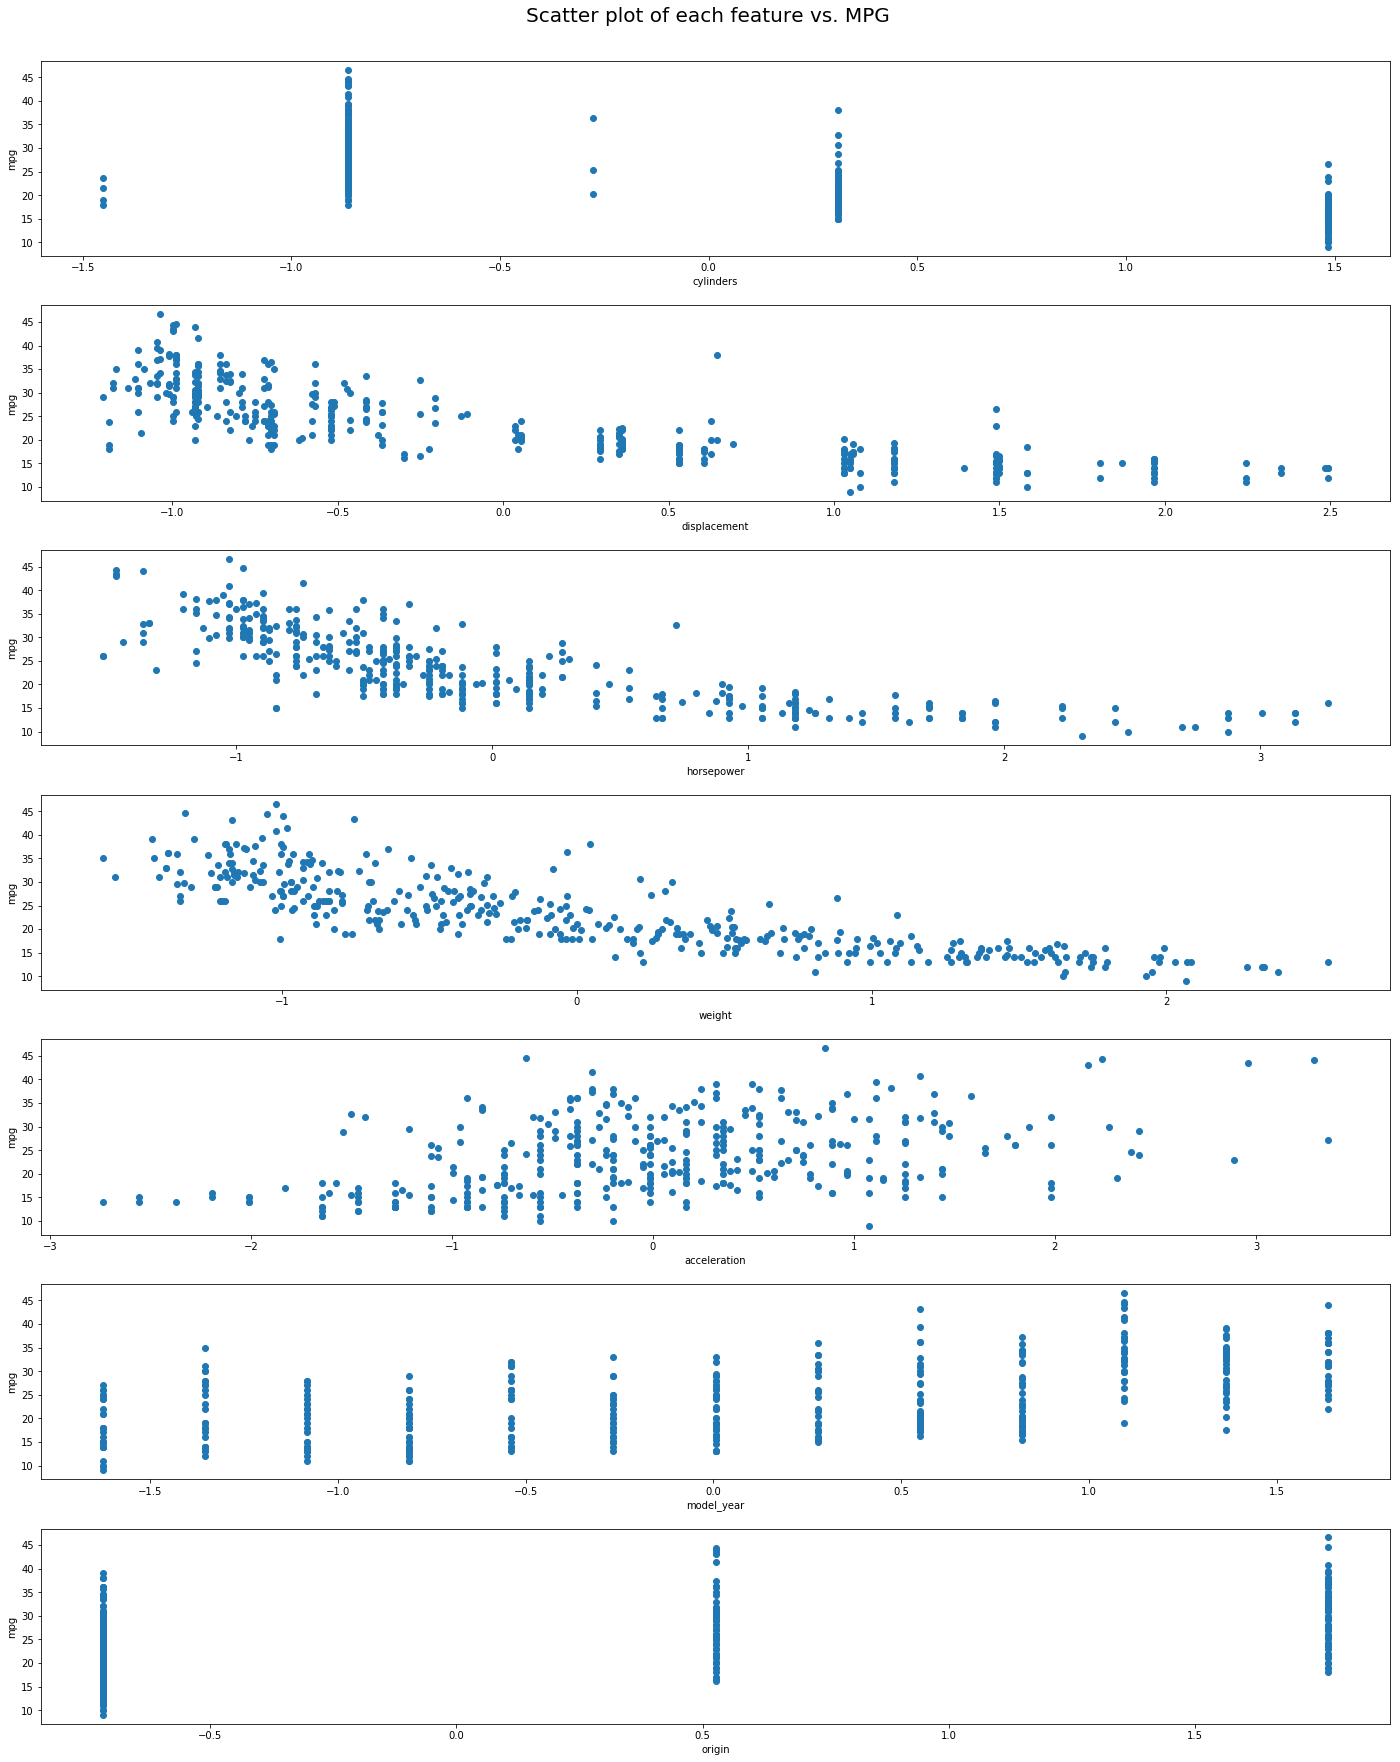

In [121]:
fig, axs = plt.subplots(7, figsize=(20,25))
fig.suptitle("Scatter plot of each feature vs. MPG", fontsize=20)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(top=0.95)
i = 0
for colname in Features.columns:
    axs[i].scatter(Features[colname], Labels)
    axs[i].set(xlabel=colname, ylabel='mpg')
    i+=1

### Data preprocessing

We use StandardScaler to normalize the features of the data

In [63]:
from sklearn.preprocessing import StandardScaler as ss
scaler = ss()

In [64]:
scaler.fit(Features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
Features = scaler.transform(Features)

In [66]:
Features = pd.DataFrame(Features, columns=col_features)
Features.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


Before we train the set, the data is split into training and test sets using train_test_split with 80-20 split.

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
Features_train, Features_test, Labels_train, Labels_test = train_test_split(Features, Labels, test_size = 0.2)

In [69]:
Labels_test.head()

179    33.0
237    30.0
55     26.0
234    25.5
141    26.0
Name: mpg, dtype: float64

### Training a regression model

Now that we have processed and split our data, we can now proceed with training a regression model for predicting mpg. 

In [70]:
from sklearn import linear_model as lm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### Functions used

This function takes the predictions and labels vectors, and computes for the R2 score, mean squared error and mean absolute error.

In [122]:
def print_scores(predictions, actual):
    print("R2 Score:", round(r2_score(predictions, actual),4))
    print("MSE:", round(mean_squared_error(predictions, actual),4))
    print("MAE:", round(mean_absolute_error(predictions, actual),4))
    print()
    return

I have created this function that takes the training and test sets and the regularization type, learning rate and iteration defaults which are to be modified some regression models that I'll be using.

In [73]:
def train_set(feat_tr, feat_te, lab_tr, lab_te, p = 'l2', r = 0.01, i = 500):
    SGD_LR = lm.SGDRegressor(n_iter = i, penalty = p, eta0 = r)
    SGD_LR.fit(feat_tr, lab_tr)
    Predictions = SGD_LR.predict(feat_te)
    print_scores(Predictions, lab_te)
    return

#### Training the regression model per feature

In this, I have created a loop that goes through each feature and trains a regression model with the default parameters

In [74]:
for col in Features_train.columns:
    print("Training with feature:", col)
    train_set(Features_train[col].values.reshape(-1,1), Features_test[col].values.reshape(-1,1), 
              Labels_train, Labels_test)

Training with feature: cylinders
R2 Score: 0.3597
MSE: 24.0172
MAE: 3.9851

Training with feature: displacement
R2 Score: 0.4494
MSE: 24.3469
MAE: 4.0472

Training with feature: horsepower
R2 Score: 0.4331
MSE: 26.4256
MAE: 4.1382

Training with feature: weight
R2 Score: 0.6325
MSE: 15.9958
MAE: 3.1423

Training with feature: acceleration
R2 Score: -1.7241
MSE: 43.4624
MAE: 5.4657

Training with feature: model_year
R2 Score: -1.2155
MSE: 41.7847
MAE: 5.4737

Training with feature: origin
R2 Score: -1.1545
MSE: 35.8468
MAE: 4.7958



Next, all the features are used to train the regression model with the default parameters

In [75]:
train_set(Features_train, Features_test, Labels_train, Labels_test)

R2 Score: 0.7568
MSE: 10.818
MAE: 2.5724



* l1 penalty

In [76]:
train_set(Features_train, Features_test, Labels_train, Labels_test, 'l1')

R2 Score: 0.7551
MSE: 10.7635
MAE: 2.5637



* l2 penalty; learning rate 10.0

In [80]:
train_set(Features_train, Features_test, Labels_train, Labels_test, 'l2', 5)

R2 Score: -0.8338
MSE: 1.6198008991650232e+22
MAE: 102256030821.613

